# KDE and Central Tendency

In [1]:
# the usuals
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx

# new for data viz
import seaborn as sns

# to explore point patterns
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy

In [47]:
# Import simplified Califrnia Conservation Easement Database shapefile 

CCED = gpd.read_file('../data/CCED_simple/CCED_California_Conservation_Easement_Database.shp')
CCED.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12297 entries, 0 to 12296
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ease_label  12297 non-null  object  
 1   sitename    12297 non-null  object  
 2   esmthldr    12297 non-null  object  
 3   eholdtyp    12297 non-null  object  
 4   pubaccess   12297 non-null  object  
 5   duration    12274 non-null  object  
 6   comments    1201 non-null   object  
 7   projectid   120 non-null    object  
 8   dtmboardap  201 non-null    object  
 9   county      12297 non-null  object  
 10  src_align   12297 non-null  object  
 11  src_attr    12235 non-null  object  
 12  cced_id     12297 non-null  int64   
 13  gis_acres   12297 non-null  float64 
 14  year_est    12297 non-null  int64   
 15  term        12297 non-null  int64   
 16  dataentry   2792 non-null   object  
 17  nced_uid    11319 non-null  object  
 18  s_emthd1    100 non-null    object  
 

In [3]:
# trim the dataset

CCED_trimmed = CCED[['sitename','esmthldr','eholdtyp','county','gis_acres','year_est','geometry']]

In [4]:
# make a copy that has the polygons of the easement boundaries converted to center points
# make a new dataframe and name the new columns cent_lat and _lon

CCED_points = CCED_trimmed.copy()
CCED_points["geometry"] = CCED_points["geometry"].centroid
CCED_points['cent_lon'] = CCED_points.geometry.x
CCED_points['cent_lat'] = CCED_points.geometry.y
CCED_points.head()

,sitename,esmthldr,eholdtyp,county,gis_acres,year_est,geometry,cent_lon,cent_lat
0,Forest Service Easement,United States Forest Service,Federal,San Diego,479.275130,1971,POINT (-12987009.331 3861418.084),-1.298701e+07,3.861418e+06
1,Forest Service Easement,United States Forest Service,Federal,San Diego,212.572028,1969,POINT (-13004227.527 3937315.064),-1.300423e+07,3.937315e+06
2,Forest Service Easement,United States Forest Service,Federal,Riverside,78.358309,1969,POINT (-12986313.852 3982695.203),-1.298631e+07,3.982695e+06
3,Forest Service Easement,United States Forest Service,Federal,San Bernardino,23.335541,1992,POINT (-13046611.436 4059609.975),-1.304661e+07,4.059610e+06
4,Forest Service Easement,United States Forest Service,Federal,El Dorado,0.524050,1981,POINT (-13360829.410 4702945.993),-1.336083e+07,4.702946e+06


In [5]:
# define the point geometry into webmercator

CCED_points = gpd.GeoDataFrame(CCED_points, 
                         crs='EPSG:3857',
                         geometry=gpd.points_from_xy(CCED_points.cent_lon, CCED_points.cent_lat))

In [6]:
CCED_points.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12297 entries, 0 to 12296
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   sitename   12297 non-null  object  
 1   esmthldr   12297 non-null  object  
 2   eholdtyp   12297 non-null  object  
 3   county     12297 non-null  object  
 4   gis_acres  12297 non-null  float64 
 5   year_est   12297 non-null  int64   
 6   geometry   12297 non-null  geometry
 7   cent_lon   12297 non-null  float64 
 8   cent_lat   12297 non-null  float64 
dtypes: float64(3), geometry(1), int64(1), object(4)
memory usage: 864.8+ KB


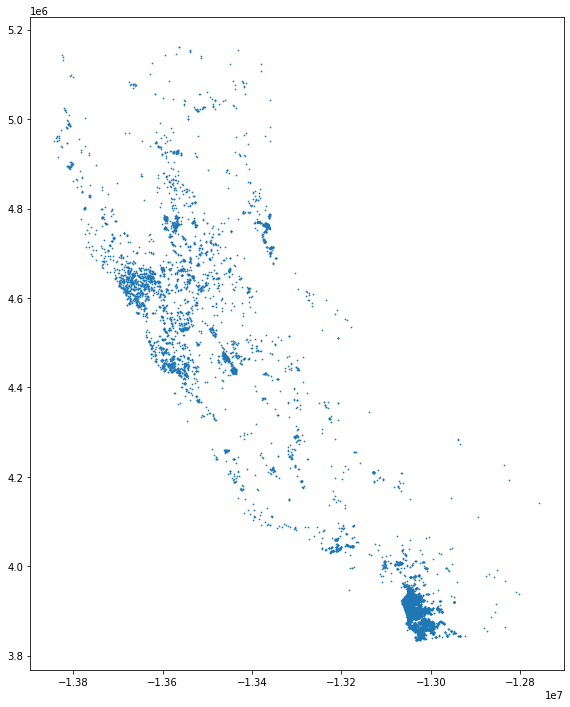

In [8]:
# basic plot
CCED_points.plot(figsize=(12,12),
                 markersize=0.5)

## Make interactive map of easement holders
This will make it easy to look at the data without it being dominated by the "Unknown, SANDAG" or "Unknown, SanGIS" entries

In [9]:
# import that interact library
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [10]:
CCED.esmthldr.value_counts()

Unknown, SanGIS reported                                5523
Unknown, SANDAG reported                                 830
United States Fish and Wildlife Service                  410
Truckee Donner Land Trust                                390
San Diego - Parks and Recreation Department, City of     361
                                                        ... 
Quail Canyon Estates, Ltd.                                 1
Golden Gate National Recreation Area                       1
La Suvera Homeowners Association                           1
San Diego - Environmental Services, City of                1
Carlsbad Arroyo Vista Homeowners Association               1
Name: esmthldr, Length: 230, dtype: int64

In [11]:
# there are probably over a thousand unique easement holders, just take the top 50
top_50_esmthldr = CCED_points.esmthldr.value_counts().head(50).index.tolist()
top_50_esmthldr

['Unknown, SanGIS reported',
 'Unknown, SANDAG reported',
 'United States Fish and Wildlife Service',
 'Truckee Donner Land Trust',
 'San Diego - Parks and Recreation Department, City of',
 'California Department of Fish and Wildlife',
 'United States Natural Resources Conservation Service',
 'Sonoma County Agricultural Preservation and Open Space District',
 'California Tahoe Conservancy',
 'Land Trust of Napa County',
 'The Nature Conservancy',
 'Poway, City of',
 'Mountains Recreation and Conservation Authority',
 'Santa Cruz, County of',
 'Sequoia Riverlands Trust',
 'Wildlife Heritage Foundation',
 'Land Trust of Santa Cruz County',
 'Western Riverside County Regional Conservation Authority',
 'Marin Agricultural Land Trust',
 'East Bay Regional Park District',
 'Tri-Valley Conservancy',
 'Center for Natural Lands Management',
 'Marin County Open Space District',
 'Yolo Land Trust',
 'Northern California Regional Land Trust',
 'Unknown',
 'Midpeninsula Regional Open Space District

### Set up function to do the interactive drop down 

In [12]:
CCED_points[CCED_points.esmthldr == 'United States Fish and Wildlife Service'].head()

,sitename,esmthldr,eholdtyp,county,gis_acres,year_est,geometry,cent_lon,cent_lat
2690,Don Edwards San Francisco Bay National Wildlif...,United States Fish and Wildlife Service,Federal,San Mateo,0.222398,2003,POINT (-13600347.482 4507441.046),-1.360035e+07,4.507441e+06
2691,Don Edwards San Francisco Bay National Wildlif...,United States Fish and Wildlife Service,Federal,San Mateo,0.279133,2003,POINT (-13600858.808 4507183.693),-1.360086e+07,4.507184e+06
2692,Don Edwards San Francisco Bay National Wildlif...,United States Fish and Wildlife Service,Federal,Santa Clara,0.336488,2003,POINT (-13578441.463 4497954.999),-1.357844e+07,4.497955e+06
2693,San Joaquin River National Wildlife Refuge 19,United States Fish and Wildlife Service,Federal,San Joaquin,0.476613,1999,POINT (-13486471.548 4540461.124),-1.348647e+07,4.540461e+06
2694,Don Edwards San Francisco Bay National Wildlif...,United States Fish and Wildlife Service,Federal,Santa Clara,0.508118,0,POINT (-13592085.740 4499897.813),-1.359209e+07,4.499898e+06


,sitename,esmthldr,eholdtyp,county,gis_acres,year_est,geometry,cent_lon,cent_lat
2690,Don Edwards San Francisco Bay National Wildlif...,United States Fish and Wildlife Service,Federal,San Mateo,0.222398,2003,POINT (-13600347.482 4507441.046),-1.360035e+07,4.507441e+06
2691,Don Edwards San Francisco Bay National Wildlif...,United States Fish and Wildlife Service,Federal,San Mateo,0.279133,2003,POINT (-13600858.808 4507183.693),-1.360086e+07,4.507184e+06
2692,Don Edwards San Francisco Bay National Wildlif...,United States Fish and Wildlife Service,Federal,Santa Clara,0.336488,2003,POINT (-13578441.463 4497954.999),-1.357844e+07,4.497955e+06
2693,San Joaquin River National Wildlife Refuge 19,United States Fish and Wildlife Service,Federal,San Joaquin,0.476613,1999,POINT (-13486471.548 4540461.124),-1.348647e+07,4.540461e+06
2694,Don Edwards San Francisco Bay National Wildlif...,United States Fish and Wildlife Service,Federal,Santa Clara,0.508118,0,POINT (-13592085.740 4499897.813),-1.359209e+07,4.499898e+06


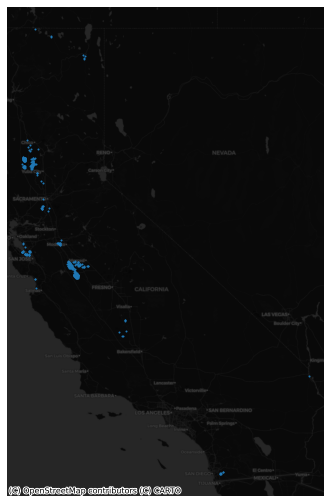

In [15]:
# table
display(CCED_points[CCED_points.esmthldr == 'United States Fish and Wildlife Service'].head()) 

# map
ax = CCED_points[CCED_points.esmthldr == 'United States Fish and Wildlife Service'].plot(figsize=(9,9), markersize=1)

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

In [19]:
@interact
def esmthldr_by(esmthldr=top_50_esmthldr):
    # table
    display(CCED_points[CCED_points.esmthldr == 'esmthldr'].head())

    # map
    ax = CCED_points[CCED_points.esmthldr == esmthldr].plot(figsize=(9,9), markersize=10)
    
    # axis
    ax.axis('off')

    # basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

interactive(children=(Dropdown(description='esmthldr', options=('Unknown, SanGIS reported', 'Unknown, SANDAG r…

## Set up interactive map for easement holder type
### Set up function

,sitename,esmthldr,eholdtyp,county,gis_acres,year_est,geometry,cent_lon,cent_lat
1758,Private Easement,Unknown,Private,El Dorado,64.209305,0,POINT (-13461860.335 4652963.635),-1.346186e+07,4.652964e+06
3450,Unknown or Unnamed,Private Owner,Private,Santa Clara,15.873949,0,POINT (-13563330.696 4500144.833),-1.356333e+07,4.500145e+06
3451,Unknown or Unnamed,Private Owner,Private,Santa Clara,23.982173,0,POINT (-13563931.985 4500789.475),-1.356393e+07,4.500789e+06
3452,Unknown or Unnamed,Private Owner,Private,Santa Clara,7.660879,0,POINT (-13543225.321 4445789.434),-1.354323e+07,4.445789e+06
3454,Unknown or Unnamed,Private Owner,Private,Santa Clara,20.984304,0,POINT (-13555327.294 4488869.299),-1.355533e+07,4.488869e+06


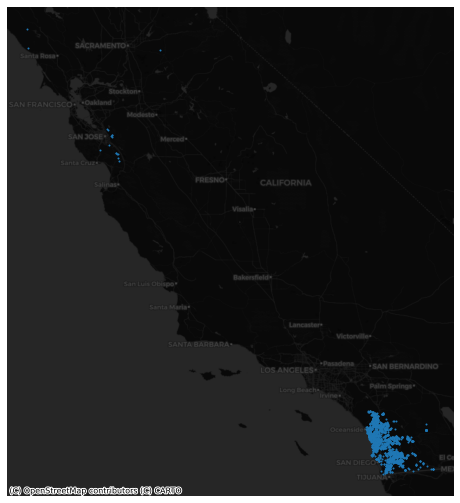

In [20]:
# table
display(CCED_points[CCED_points.eholdtyp == 'Private'].head()) 

# map
ax = CCED_points[CCED_points.eholdtyp == 'Private'].plot(figsize=(9,9), markersize=1)

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

In [29]:
# I know there are less than 10 eholdtyp unique values so I will do all of them 

eholdtyp_all = CCED_points.eholdtyp.value_counts().index.tolist()
eholdtyp_all

['Unknown',
 'NonProfit',
 'Private',
 'Association',
 'Federal',
 'Special District',
 'State',
 'City',
 'County',
 'Government',
 'JPA']

In [84]:
# make the interactive box with the function

@interact
def eholdtyp_by(eholdtyp=eholdtyp_all):
    display(CCED_points[(CCED_points.eholdtyp == 'eholdtyp')].head())
    ax = CCED_points[(CCED_points.eholdtyp == eholdtyp)].plot(figsize=(9,9), markersize=1)
    ax.axis('off')
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

interactive(children=(Dropdown(description='eholdtyp', options=('Unknown', 'NonProfit', 'Private', 'Associatio…

In [31]:
# make the interactive dropdown have eholdtyp and county so data can be zoomed in.
# a little inconvenient because not all counties have all the eholdtyp represented

@interact
def eholdtyp_by(eholdtyp=eholdtyp_all,county=CCED_points.county.unique().tolist()):
    display(CCED_points[(CCED_points.eholdtyp == 'eholdtyp')&(CCED_points.county=='county')].head())
    ax = CCED_points[(CCED_points.eholdtyp == eholdtyp)&(CCED_points.county==county)].plot(figsize=(9,9), markersize=1)
    ax.axis('off')
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)


interactive(children=(Dropdown(description='eholdtyp', options=('Unknown', 'NonProfit', 'Private', 'Associatio…

## Set up for KDE

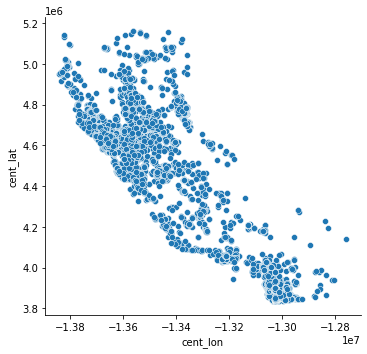

In [32]:
# just do a basic plot, make sure I put the right columns in the x and y

sns.relplot(data=CCED_points,
            x='cent_lon', 
            y='cent_lat')

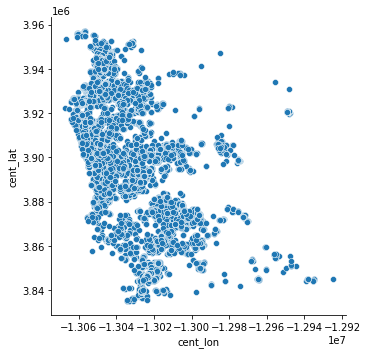

In [35]:
# just curious about San Diego

sns.relplot(data=CCED_points[CCED_points['county']=='San Diego'],
            x='cent_lon', 
            y='cent_lat')

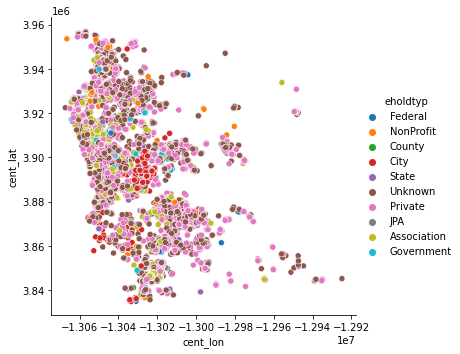

In [37]:
# color code by eholdtyp

sns.relplot(data=CCED_points[CCED_points['county']=='San Diego'],
            x='cent_lon', 
            y='cent_lat',
            hue='eholdtyp')

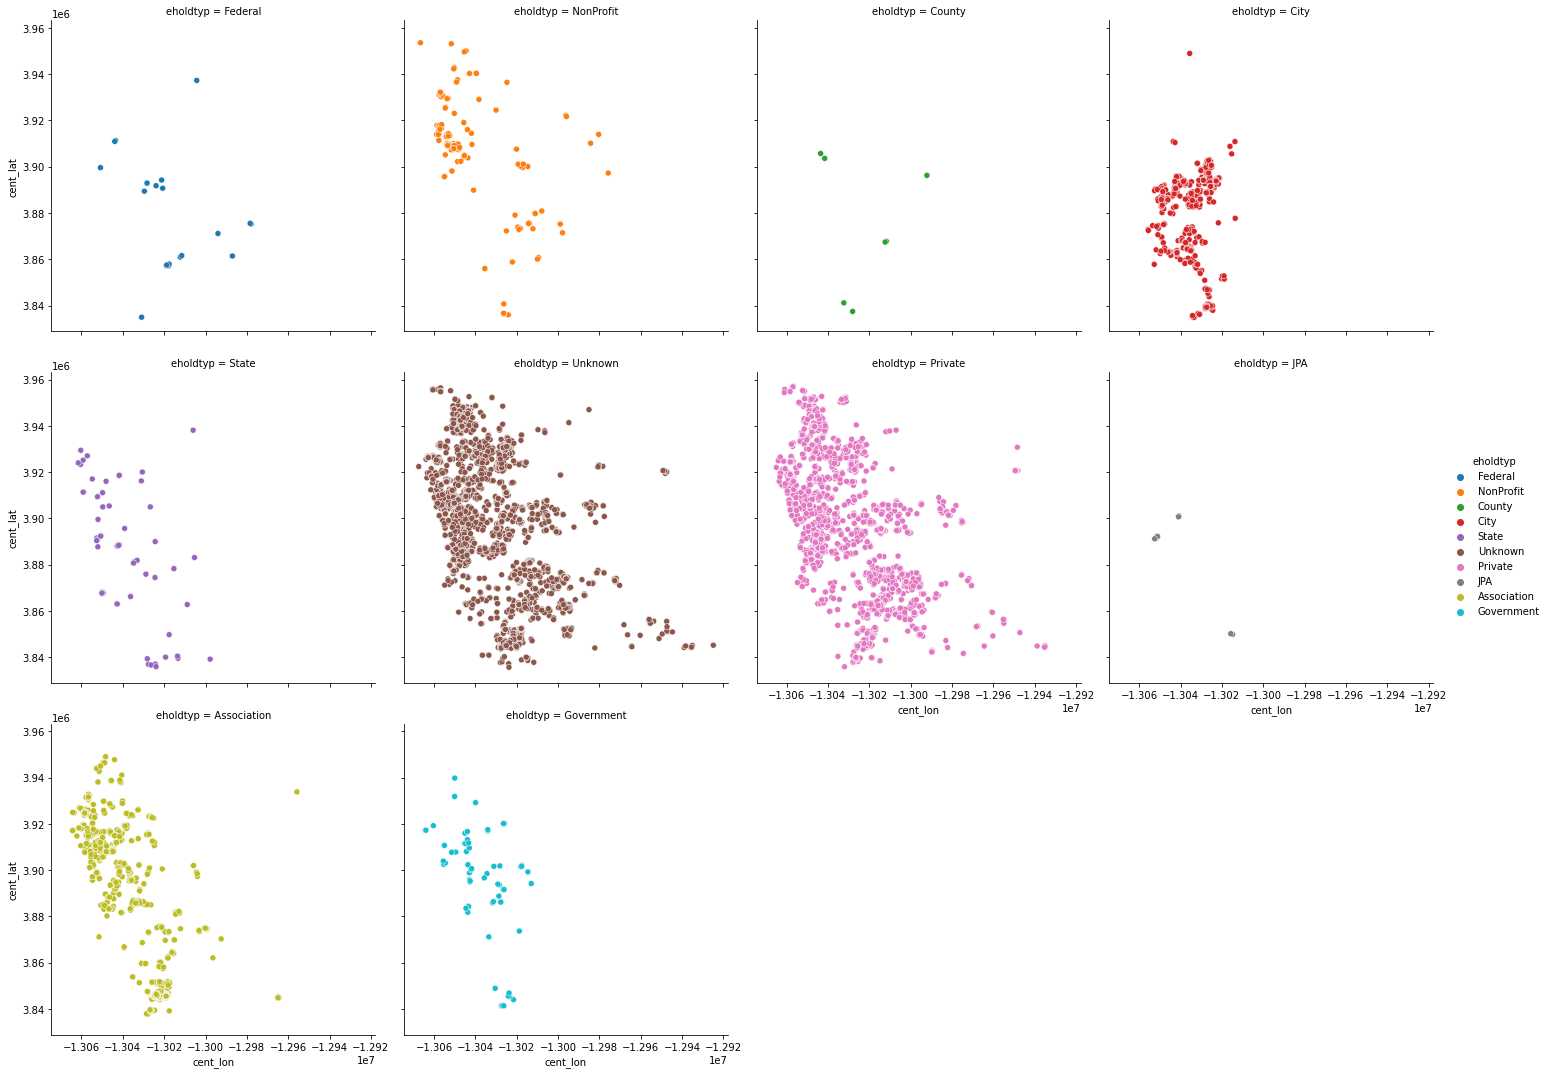

In [41]:
# too much going on in the previous plot, separate out each type in a separate plot

sns.relplot(data=CCED_points[CCED_points['county']=='San Diego'],
            x='cent_lon', 
            y='cent_lat',
            hue='eholdtyp',
            col='eholdtyp',
            col_wrap=4)

Suspicious, Unknown aligns pretty well with Private, though there are some points that are clearly different

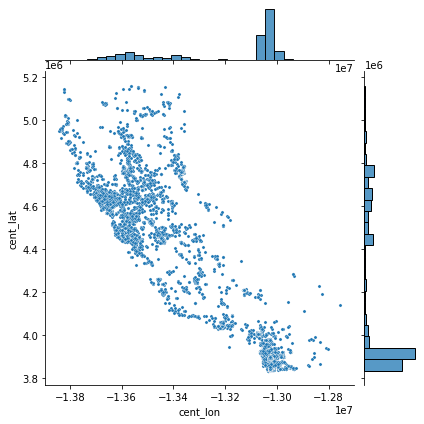

In [43]:
# take a look at the distribution in the state by east-west and north-south

g = sns.jointplot(data = CCED_points,
                  x='cent_lon', 
                  y='cent_lat',
                  s=10)

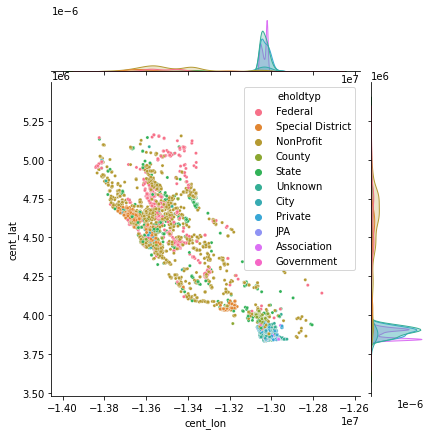

In [44]:
# try with the different eholdtyp

g = sns.jointplot(data = CCED_points,
                  x='cent_lon', 
                  y='cent_lat',
                  hue='eholdtyp',
                  s=10)

### Do the KDE plot of distribution of all easements

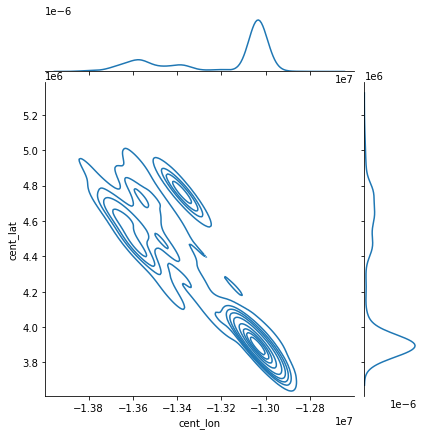

In [45]:
# kde plot
sns.jointplot(data = CCED_points,
              x='cent_lon', 
              y='cent_lat', 
              kind='kde')

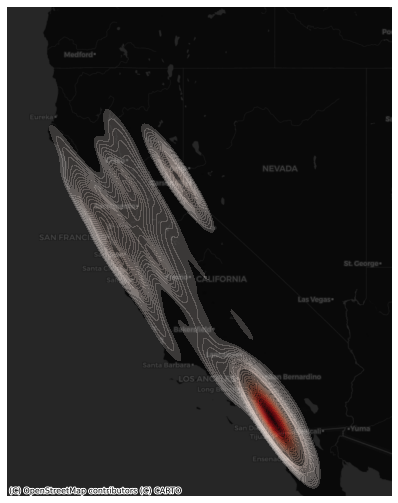

In [46]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# kdeplot, i.e. heat map
sns.kdeplot(x = CCED_points.cent_lon, 
            y = CCED_points.cent_lat,
            n_levels=50, 
            shade=True,
            thresh=0.05,
            alpha=0.2, 
            cmap='Reds')

# axes
ax.axis('off')

# basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

Obviously this is skewed towards San Diego because the county has over half of all the easements in the dataset. Out of curiosity, I will try a KDE without its influence to see where other clusters are.

### KDE without San Diego County, so I can better see any other patterns

In [60]:
# make a list to subset data to exclude San Diego

no_SD = CCED_points.county.value_counts().tail(57).index.tolist()
no_SD

['Sonoma',
 'Nevada',
 'Santa Cruz',
 'Merced',
 'Placer',
 'Riverside',
 'Marin',
 'Napa',
 'Los Angeles',
 'Santa Clara',
 'Alameda',
 'Colusa',
 'Yolo',
 'El Dorado',
 'Mendocino',
 'Contra Costa',
 'San Luis Obispo',
 'Sacramento',
 'Kern',
 'San Mateo',
 'Monterey',
 'Butte',
 'Tehama',
 'Humboldt',
 'Solano',
 'Shasta',
 'Tulare',
 'Sutter',
 'Stanislaus',
 'San Joaquin',
 'Santa Barbara',
 'Fresno',
 'Ventura',
 'Orange',
 'San Bernardino',
 'Glenn',
 'Modoc',
 'Siskiyou',
 'Calaveras',
 'Sierra',
 'Madera',
 'Lassen',
 'Mono',
 'Lake',
 'Yuba',
 'Plumas',
 'Mariposa',
 'Amador',
 'San Benito',
 'Alpine',
 'Imperial',
 'Kings',
 'Del Norte',
 'Inyo',
 'Tuolumne',
 'Trinity',
 'San Francisco']

In [65]:
# define a new subset using the list 

no_SD = CCED_points[CCED_points.county.isin(['Sonoma',
 'Nevada',
 'Santa Cruz',
 'Merced',
 'Placer',
 'Riverside',
 'Marin',
 'Napa',
 'Los Angeles',
 'Santa Clara',
 'Alameda',
 'Colusa',
 'Yolo',
 'El Dorado',
 'Mendocino',
 'Contra Costa',
 'San Luis Obispo',
 'Sacramento',
 'Kern',
 'San Mateo',
 'Monterey',
 'Butte',
 'Tehama',
 'Humboldt',
 'Solano',
 'Shasta',
 'Tulare',
 'Sutter',
 'Stanislaus',
 'San Joaquin',
 'Santa Barbara',
 'Fresno',
 'Ventura',
 'Orange',
 'San Bernardino',
 'Glenn',
 'Modoc',
 'Siskiyou',
 'Calaveras',
 'Sierra',
 'Madera',
 'Lassen',
 'Mono',
 'Lake',
 'Yuba',
 'Plumas',
 'Mariposa',
 'Amador',
 'San Benito',
 'Alpine',
 'Imperial',
 'Kings',
 'Del Norte',
 'Inyo',
 'Tuolumne',
 'Trinity',
 'San Francisco'])]

In [66]:
# make sure it worked, I know SD had a bit over 7,000 easements
no_SD.shape

(4908, 9)

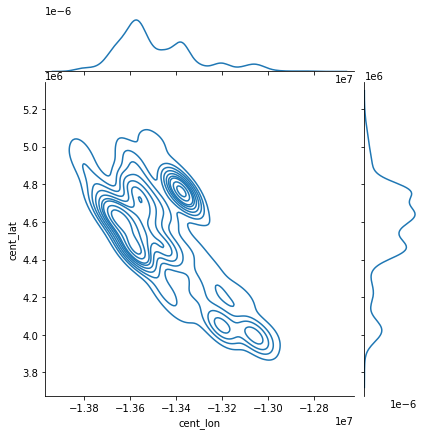

In [67]:
# basic kde with this new subset

sns.jointplot(data = no_SD,
              x='cent_lon', 
              y='cent_lat', 
              kind='kde')

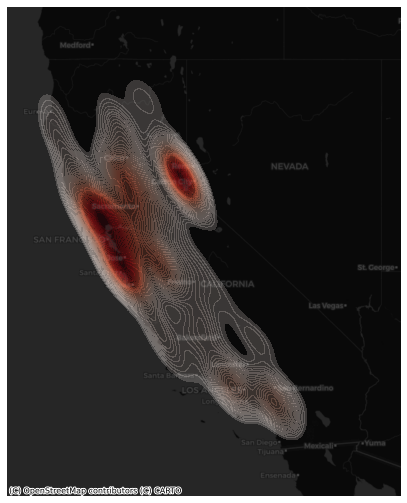

In [68]:
# heat map without San Diego

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# kdeplot, i.e. heat map
sns.kdeplot(x = no_SD.cent_lon, 
            y = no_SD.cent_lat,
            n_levels=50, 
            shade=True,
            thresh=0.05,
            alpha=0.2, 
            cmap='Reds')

# axes
ax.axis('off')

# basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

Interesting, looks like the Bay Area has a cluster, probably Santa Clara and Sonoma Counties. The cluster a little to the west looks to be around Lake Tahoe. 

## Central Tendency Measures and Maps

In [69]:
# compute the mean and median centers including San Diego
mean_center = centrography.mean_center(CCED_points[['cent_lon','cent_lat']])
med_center = centrography.euclidean_median(CCED_points[['cent_lon','cent_lat']])

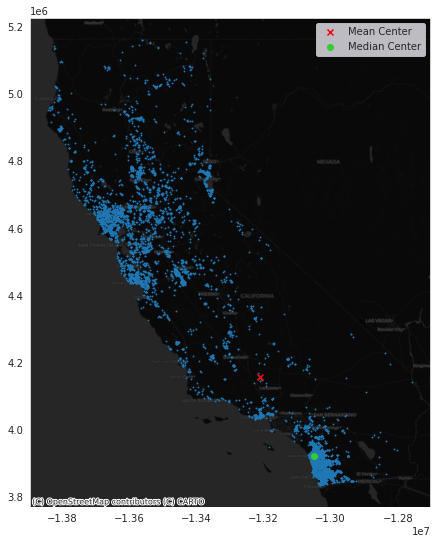

In [70]:
# set the style without grid lines
sns.set_style('dark')

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Plot points
ax.scatter(CCED_points['cent_lon'], CCED_points['cent_lat'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

ax.legend()

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)
# Display
plt.show()

Since SD has over 7,000, it makes sense that the median center is located there. I don't feel that either of these measures is particularly meaningful.

In [71]:
major, minor, rotation = centrography.ellipse(CCED_points[['cent_lon','cent_lat']])

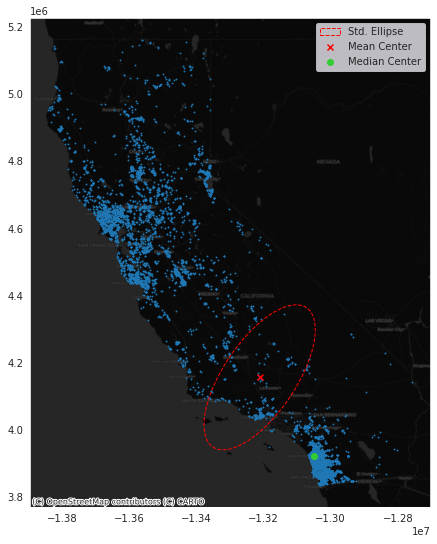

In [85]:
# set the style without grid lines
sns.set_style('dark')

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Plot points
ax.scatter(CCED_points['cent_lon'], CCED_points['cent_lat'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', linestyle='--',
                  label='Std. Ellipse')

ax.add_patch(ellipse)

ax.legend()

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

# Display
plt.show()

I don't really understand why the ellipsis is wide instead of long, but I double checked and I'm pretty sure I put lat and lon in the right place, or else the points would be messed up on the CA map

In [81]:
# make a version that you can select the eholdtyp. This will make it easy to see relationships without too much
# interference from San Diego, which has the bulk of "Unknown" 

@interact
def CCED_ellipse(eholdtyp=CCED_points.eholdtyp.unique().tolist()):
    # filter the data by race
    CCED_filtered = CCED_points[CCED_points.eholdtyp == eholdtyp]

    # mean center and median
    mean_center = centrography.mean_center(CCED_filtered[['cent_lon','cent_lat']])
    med_center = centrography.euclidean_median(CCED_filtered[['cent_lon','cent_lat']])

    # standard ellipse
    major, minor, rotation = centrography.ellipse(CCED_filtered[['cent_lon','cent_lat']])

    # Set up figure and axis
    f, ax = plt.subplots(1, figsize=(9, 9))

    # plot easement points
    ax.scatter(CCED_filtered['cent_lon'], CCED_filtered['cent_lat'], s=0.75)

    # add the mean and median center points
    ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
    ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

    # heatmap
    sns.kdeplot(x = CCED_filtered.geometry.x, 
                y = CCED_filtered.geometry.y,
                n_levels=20, 
                shade=False,
                thresh=0.1,
                alpha=0.3, 
                cmap='Reds', 
                ax=ax)

    # Construct the standard ellipse using matplotlib
    ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                      width=major*2, # centrography.ellipse db_filtered
                      height=minor*2, 
                      angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                      facecolor='none', 
                      edgecolor='red', linestyle='--',
                      label='Std. Ellipse')

    ax.add_patch(ellipse)

    ax.legend()

    ax.axis('Off')

    ax.set_title(str(len(CCED_filtered)) + ' easements on private land held by "' + eholdtyp + '" easement holder')

    # add a basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)
    # Display
    plt.show()

interactive(children=(Dropdown(description='eholdtyp', options=('Federal', 'Special District', 'NonProfit', 'C…

I think this interactive map is actually quite telling. Some conclusions I can draw:

Federal: concentrated in the north, probably forested areas 

Special Districts: biggest concentration in NorCal, but a cluster in San Diego as well. I know there are well-established open 
space districts in NorCal, such as the Santa Clara Open Space Authority. The Central Valley is noticeably empty

Noprofits: pretty good spread throughout the state, though again clustered in NorCal and SD. Most concentration around Lake Tahoe, wonder why

County: Two clusters, one around the Central Coast and the other appears to be Los Angeles County. Again, Central Valley is empty.

Private: mostly concentrated in San Diego County. Maybe SD county is the only one who keeps decent records of privately established easements.